## 3.2 Exercise: Preparing for Exploratory Data Analysis Using Python
#### Scott Breitbach
#### DSC530 Week 3
#### 16Sep20

# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [3]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [4]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [6]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [7]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [8]:
pregordr[0]

1

Select a slice from a column.

In [11]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [10]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [14]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [15]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [19]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
# print(indices)
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [21]:
birthord = preg['birthord']
birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [22]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [23]:
prglngth = preg['prglngth']
prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [24]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [28]:
preg['totalwgt_kg'] = preg['totalwgt_lb'] / 2.205
preg.totalwgt_kg.mean()

3.2950695952940445


`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [29]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [30]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [34]:
resp.age_r.value_counts().sort_index()

# Youngest = 15
# Oldest = 44

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [35]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [36]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.117914
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494331
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899093
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.117914


How old is the respondent with `caseid` 1?

In [39]:
resp[resp.caseid==1].age_r

# Respondent's age = 44

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [41]:
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [42]:
preg[preg.caseid==5012].totalwgt_lb

# Birthweight = 6.0 lb

5515    6.0
Name: totalwgt_lb, dtype: float64

In [49]:
from __future__ import print_function

import sys
import numpy as np
import thinkstats2
import nsfg

def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df

def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass

def main():
    """Tests the functions in this module.

    script: string script name
    """
    # read and validate the respondent file
    resp = ReadFemResp()

    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)

    
    print('All tests passed.')
    

if __name__ == '__main__':
    main()
    
resp.pregnum.value_counts().sort_index()

All tests passed.


0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

#### Exercise 2-1

To summarize pregnancy length of firstborns compared to other newborns based on what I've learned in this chapter, I would say that the data shows very little overall difference in arrival times between firstborns and other newborns. Given the wide variance in pregnancy length, with a standard deviation of over two weeks, a 13 hour difference seems pretty small, and shows, if anything, that first babies actually arrive earlier, not later. 

If I wanted to blow things out of proportion to make the news, I would probably first get a p-value to see if the results are significant. If they were, my headline would be something like: "Has your family been lying to you? New study reveals that firstborns arrive significantly earlier than later pregnancies!"

If I was trying to reassure an anxious patient, I would point out the wide spread in pregnancy lengths (which skew toward being shorter than the typical length if she doesn't like being pregnant) to show that there are a wide variety of normal pregnancies that produce healthy babies. 

"Do first babies arrive late?"

It is often said that a mother's first pregnancy lasts longer than her later pregnancies. Let's take a look at the data to see if this old wives tale is true, or if the first pregnancy just feels longer. Using CDC data from a recent National Survey of amily Growth, we've learned that the average length of a first pregnancy is 38.60 weeks, compared to 38.52 weeks for all other pregnancies combined. If you're thinking this looks like a small difference, you'd be right, because this amounts to just a little over 13 hours and not just that, but the first pregnancies are, on average, actually shorter not longer. Looking at all the data together, we get a standard deviation of 2.70 weeks, making a difference of just 0.08 weeks seem pretty insignificant overall. So considering the many things a new mother has to concern herself with, whether her this newborn will arrive earlier or later than any of her following pregnancies isn't one of them.

#### Exercise 2-4

In [59]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np

In [ ]:
# Filter for only live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

# Create firsts and others groupings
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [70]:
# Set floor for weights to avoid overlap
first_weights = np.floor(firsts.totalwgt_lb)
other_weights = np.floor(others.totalwgt_lb)

# Set histograms
first_hist = thinkstats2.Hist(first_weights, label = 'Firstborns')
other_hist = thinkstats2.Hist(other_weights, label = 'Later Born')

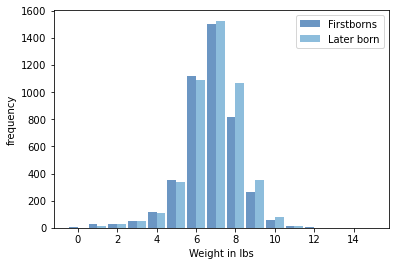

<Figure size 576x432 with 0 Axes>

In [71]:
# Display histogram
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width = width)
thinkplot.Hist(other_hist, align='left', width = width)
thinkplot.Show(xlabel='Weight in lbs', ylabel='frequency')

In [72]:
# Calculate means for firsts and for others
firsts_mean = firsts.totalwgt_lb.mean()
others_mean = others.totalwgt_lb.mean()

firsts_mean, others_mean

(7.201094430437772, 7.325855614973262)

In [80]:
# Calculate standard deviation for overall total weights
std = live.totalwgt_lb.std()
std

1.4082934455690168

In [73]:
# Calculate difference in means
others_mean - firsts_mean

0.12476118453549034

In [78]:
# Difference in ounces
(others_mean - firsts_mean) * 16

1.9961789525678455

In [75]:
# Define function to calculate Cohen's d
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [76]:
# Calculate Cohen's d for groups by total weight
CohenEffectSize(firsts['totalwgt_lb'], others['totalwgt_lb'])

-0.088672927072602

In [77]:
# Calculate Cohen's d for groups by pregnancy length
CohenEffectSize(firsts['prglngth'], others['prglngth'])

0.028879044654449883

At a Cohen's d of -0.089 standard deviations, the difference in weight between firstborns and later born infants, while not quite as small as the difference for pregnancy length (at 0.029 standard deviations), is still quite small. The mean weight of firstborns is only 2 ounces smaller than other births, which is well within the standard deviation for all weights, which is around 1.4 pounds.